In [1]:
import os
while os.path.split(os.getcwd())[1] != "laplacian-score-4-time-series":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, acovf

from src.experiments.datasets import Dataset, earthquakes_ds, wafer_ds, worms_ds

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

        4449ms INFO  [datasets.py] Initiating dataset Earthquakes
        4449ms INFO  [datasets.py] More info at https://timeseriesclassification.com/description.php?Dataset=Earthquakes
        4451ms INFO  [datasets.py] Initiating dataset Wafer
        4452ms INFO  [datasets.py] More info at https://timeseriesclassification.com/description.php?Dataset=Wafer
        4453ms INFO  [datasets.py] Initiating dataset WormsTwoClass
        4454ms INFO  [datasets.py] More info at https://timeseriesclassification.com/description.php?Dataset=WormsTwoClass


        7470ms INFO  [datasets.py] Wafer found at /data/Wafer
        7470ms INFO  [datasets.py] Loading dataset from disk: Wafer


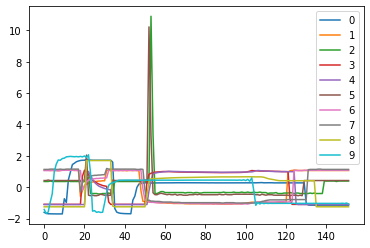

In [2]:
# Show examples
ds = wafer_ds
for i in range(10):
    plt.plot(np.array(ds.data.iloc[i, :-1]), label=str(i))
plt.legend()
plt.show()

       16965ms INFO  [datasets.py] Earthquakes found at /data/Earthquakes
       16966ms INFO  [datasets.py] Loading dataset from disk: Earthquakes
       17146ms INFO  [datasets.py] WormsTwoClass found at /data/WormsTwoClass
       17146ms INFO  [datasets.py] Loading dataset from disk: WormsTwoClass


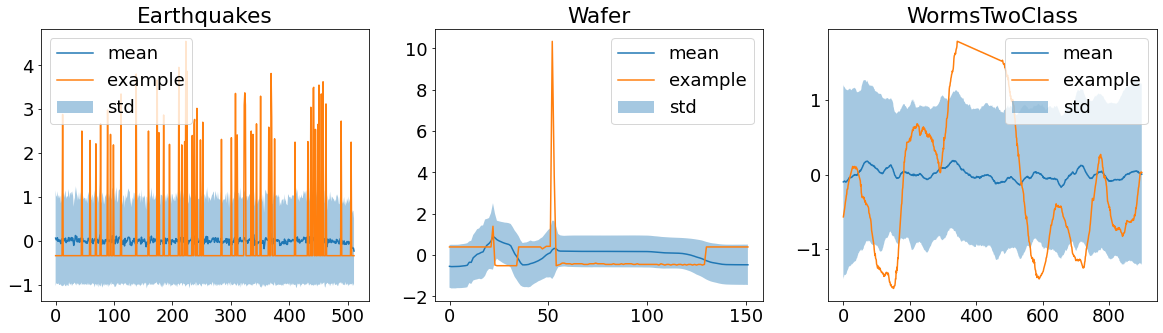

In [3]:
%matplotlib inline
np.random.seed(3)

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, ds in enumerate([earthquakes_ds, wafer_ds, worms_ds]):
    a = np.array(ds.data.iloc[:, :-1])
    a_mean = a.mean(axis=0)
    a_std = a.std(axis=0)
    idx = np.arange(a.shape[1])
    a_example = a[np.random.randint(0, a.shape[0])]
    ax[i].plot(idx, a_mean, label='mean')
    ax[i].plot(idx, a_example, label='example')
    ax[i].fill_between(idx, a_mean - a_std, a_mean + a_std, alpha=0.4, label='std')
    ax[i].legend()
    ax[i].set_title(ds.name)
plt.savefig('figures/ds_visualization.png', bbox_inches='tight')
plt.show()

       25835ms INFO  [datasets.py] Earthquakes found at /data/Earthquakes
       25836ms INFO  [datasets.py] Loading dataset from disk: Earthquakes
       26142ms INFO  [datasets.py] Wafer found at /data/Wafer
       26143ms INFO  [datasets.py] Loading dataset from disk: Wafer
       27638ms INFO  [datasets.py] WormsTwoClass found at /data/WormsTwoClass
       27639ms INFO  [datasets.py] Loading dataset from disk: WormsTwoClass


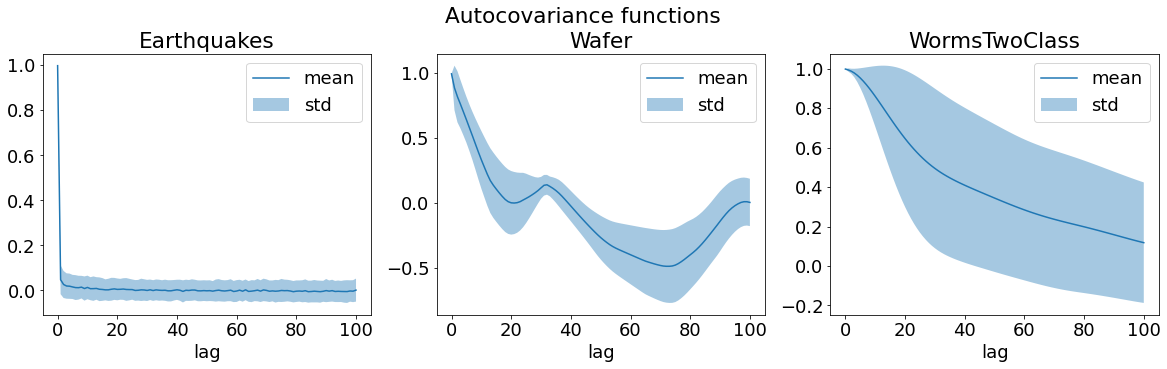

In [2]:
%matplotlib inline
np.random.seed(3)
nlags = 100

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, ds in enumerate([earthquakes_ds, wafer_ds, worms_ds]):
    a = np.array(ds.data.iloc[:, :-1])
    acov = np.zeros((a.shape[0], nlags + 1))
    for k in range(a.shape[0]):
        acov[k] = acovf(a[k], adjusted=True, nlag=nlags, fft=False)
    acov_mean = acov.mean(axis=0)
    acov_std = acov.std(axis=0)
    idx = np.arange(nlags + 1)
    ax[i].plot(idx, acov_mean, label='mean')
    ax[i].fill_between(idx, acov_mean - acov_std, acov_mean + acov_std, alpha=0.4, label='std')
    ax[i].legend()
    ax[i].set_title(ds.name)
    ax[i].set_xlabel('lag')
plt.suptitle('Autocovariance functions')
plt.subplots_adjust(top=0.85)
plt.savefig('figures/ds_acov.png', bbox_inches='tight')
plt.show()